In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Read the csv file into a pandas DataFrame
violent = pd.read_csv('../Data/Incidents_Violent.csv')
violent.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Year,Time,Time_Frame,PdDistrict,Resolution,Address,Longitude,Latitude,Police_Districts
0,123436,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Friday,2004-07-02,2004,14:08:00,3,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,1.0
1,384456,"SEX OFFENSES, FORCIBLE",SODOMY (ADULT VICTIM),Wednesday,2010-01-06,2010,15:00:00,3,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,800 Block of BRYANT ST,-122.403405,37.775421,1.0
2,571158,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,2010-05-10,2010,14:25:00,3,SOUTHERN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,800 Block of BRYANT ST,-122.403405,37.775421,1.0
3,600638,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Thursday,2010-05-20,2010,14:40:00,3,SOUTHERN,EXCEPTIONAL CLEARANCE,800 Block of BRYANT ST,-122.403405,37.775421,1.0
4,810207,KIDNAPPING,FALSE IMPRISONMENT,Wednesday,2003-07-09,2003,21:15:00,4,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,1.0


In [3]:
violent = violent[["IncidntNum","Category", "Time", "Time_Frame", "PdDistrict", "DayOfWeek", "Date"]]

In [4]:
violent["month"] = pd.DatetimeIndex(violent['Date']).month
violent["year"]= pd.DatetimeIndex(violent['Date']).year
violent["hour"]= pd.DatetimeIndex(violent['Time']).hour

violent.head()

,IncidntNum,Category,Time,Time_Frame,PdDistrict,DayOfWeek,Date,month,year,hour
0,123436,"SEX OFFENSES, FORCIBLE",14:08:00,3,SOUTHERN,Friday,2004-07-02,7,2004,14
1,384456,"SEX OFFENSES, FORCIBLE",15:00:00,3,SOUTHERN,Wednesday,2010-01-06,1,2010,15
2,571158,"SEX OFFENSES, FORCIBLE",14:25:00,3,SOUTHERN,Monday,2010-05-10,5,2010,14
3,600638,"SEX OFFENSES, FORCIBLE",14:40:00,3,SOUTHERN,Thursday,2010-05-20,5,2010,14
4,810207,KIDNAPPING,21:15:00,4,SOUTHERN,Wednesday,2003-07-09,7,2003,21


In [5]:
# group_violent = violent.groupby(["Category","Time_Frame", "PdDistrict", "DayOfWeek", "month"])["IncidntNum"].count().reset_index(name="count")
group_violent = violent.groupby(["Time_Frame", "PdDistrict", "DayOfWeek", "month"])["IncidntNum"].count().reset_index(name="count")

group_violent.head()

,Time_Frame,PdDistrict,DayOfWeek,month,count
0,1,BAYVIEW,Friday,1,63
1,1,BAYVIEW,Friday,2,38
2,1,BAYVIEW,Friday,3,64
3,1,BAYVIEW,Friday,4,51
4,1,BAYVIEW,Friday,5,62


In [6]:
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(group_violent.astype(str)[["Time_Frame", "PdDistrict", "DayOfWeek", "month"]])
y = group_violent["count"].values.reshape(-1, 1)
X.head()

,Time_Frame_1,Time_Frame_2,Time_Frame_3,Time_Frame_4,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Create a StandardScater model and fit it to the training data

# import warnings
# warnings.simplefilter('ignore')

# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

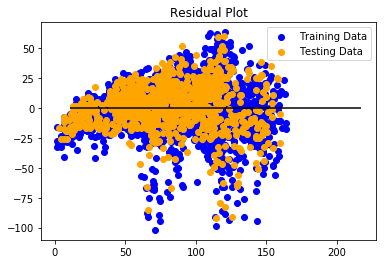

In [11]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [12]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)
predicted2 = model.predict(X_train)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

mse2 = mean_squared_error(y_train, predicted2)
r22 = r2_score(y_train, predicted2)


print(f"TEST MSE: {mse}, R2: {r2}")
print(f"TRAIN MSE: {mse2}, R2: {r22}")

TEST MSE: 391.5469494047619, R2: 0.7523299117340811
TRAIN MSE: 400.55894717261907, R2: 0.7670215614126346


In [13]:
X.columns

Index(['Time_Frame_1', 'Time_Frame_2', 'Time_Frame_3', 'Time_Frame_4',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'DayOfWeek_Friday', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'month_1', 'month_10',
       'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object')

In [14]:
model.coef_

array([[ 1.62569839e+14,  1.62569839e+14,  1.62569839e+14,
         1.62569839e+14,  1.02891367e+14,  1.02891367e+14,
         1.02891367e+14,  1.02891367e+14,  1.02891367e+14,
         1.02891367e+14,  1.02891367e+14,  1.02891367e+14,
         1.02891367e+14,  1.02891367e+14,  3.01623198e+13,
         3.01623198e+13,  3.01623198e+13,  3.01623198e+13,
         3.01623198e+13,  3.01623198e+13,  3.01623198e+13,
        -8.61682963e+12, -8.61682963e+12, -8.61682963e+12,
        -8.61682963e+12, -8.61682963e+12, -8.61682963e+12,
        -8.61682963e+12, -8.61682963e+12, -8.61682963e+12,
        -8.61682963e+12, -8.61682963e+12, -8.61682963e+12]])

In [15]:
model.intercept_

array([-2.87006696e+14])

In [ ]:
# # you must divide your coefficient array element wise by the (since v0.17) scaler.scale_ array: 
# coefficients = np.true_divide(model.coef_, X_scaler.scale_)

# # you must subtract from your intercept the inner product of the resulting coefficients (the division result) array with the scaler.mean_ array: intercept = lr.intercept_ - np.dot(coefficients, scaler.mean_)
# coefficients

In [ ]:
# intercept = model.intercept_ - np.dot(coefficients, X_scaler.mean_)
# intercept

In [16]:
new = group_violent.loc[67]
new

Time_Frame          1
PdDistrict    BAYVIEW
DayOfWeek     Tuesday
month               8
count              54
Name: 67, dtype: object